In [1]:
#Step 1: Importing the Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#Step 2: Loading the Dataset
customer_data = pd.read_csv('Churn_Modelling.csv')
customer_data.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [4]:
#Step 3: Feature Selection
columns = customer_data.columns.values.tolist()
print(columns)

['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


In [5]:
#To drop these three columns
dataset = customer_data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [6]:
#Step 4: Converting Categorical Columns to Numeric Columns
#We have two categorical columns: Geography and Gender.
#These two columns contain data in textual format; we need to convert them to numeric columns.
dataset =  dataset.drop(['Geography', 'Gender'], axis=1)

In [7]:
#A better way to convert such categorical columns to numeric columns is by using one-hot encoding.
#Let's convert both the Geography and Gender columns into numeric columns.
Geography = pd.get_dummies(customer_data.Geography).iloc[:,1:]
Gender = pd.get_dummies(customer_data.Gender).iloc[:,1:]

In [8]:
#The Geography data frame contains two columns instead of three.
#We need to add the Geography and Gender data frames back to the data set to create the final dataset.
dataset = pd.concat([dataset,Geography,Gender], axis=1)

In [9]:
#Step 5: Data Preprocessing
#We need to isolate the variable that we're predicting from the dataset.
X = dataset.drop(['Exited'], axis=1)
y = dataset['Exited']

In [10]:
#Here, X is our feature set; it contains all the columns except the one that we have to predict (Exited). 
#The label set, y, contains only the Exited column.
#We'll use 20% of the data for the test set and the remaining 80% for the training set 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [11]:
#Step 6: Machine Learning Algorithm Training
#Use the RANDOM FOREST ALGORITHM, since it's simple and one of the most powerful algorithms for classification problems.
#To train this algorithm, we call the fit method and pass in the feature set (X) and the corresponding label set (y).
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=200, random_state=0)  
classifier.fit(X_train, y_train)  
predictions = classifier.predict(X_test)

In [12]:
#Step 7: Machine Learning Algorithm Evaluation
#He algorithm has been trained, it's time to see how well it performs. 
#The most commonly used metrics are the F1 MEASURE, PRECISION, RECALL, AND ACCURACY.
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test,predictions ))  
print(accuracy_score(y_test, predictions ))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1595
           1       0.73      0.51      0.60       405

    accuracy                           0.86      2000
   macro avg       0.81      0.73      0.76      2000
weighted avg       0.85      0.86      0.85      2000

0.8635


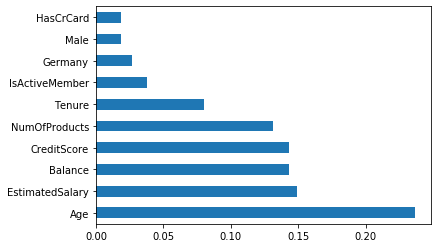

In [13]:
#Step 8: Feature Evaluation
#RandomForestClassifier contains an attribute named feature_importance that contains information about the most important features for a given classification.
feat_importances = pd.Series(classifier.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')